In [38]:
import numpy as np
import pandas as pd
pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       )
import pingouin as pg
import scipy as scp
import scipy.stats as stats
import seaborn as sns

In [39]:
# Function to insert row in the dataframe
def Insert_row_(row_number, df, row_value):
    # Slice the upper half of the dataframe
    df1 = df[0:row_number]
  
    # Store the result of lower half of the dataframe
    df2 = df[row_number:]
  
    # Insert the row in the upper half dataframe
    df1.loc[row_number]=row_value
  
    # Concat the two dataframes
    df_result = pd.concat([df1, df2])
  
    # Reassign the index labels
    df_result.index = [*range(df_result.shape[0])]
  
    # Return the updated dataframe
    return df_result

In [40]:
Likes_df = pd.read_csv('MMT_Likes.csv')
Lookup_Table = pd.read_csv('MMT_Lookup.csv')


In [41]:
init = np.zeros((1,9))
User_likes_df = pd.DataFrame(init, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic'])
User_likes_df.shape

(1, 9)

In [42]:
Likes_df.shape

(30, 5)

In [ ]:
detected = []
for i in range(len(Likes_df)):
    mean = np.zeros(9, dtype=float)
    matches = 0
    for j in range(5):
        for k in range(len(Lookup_Table)):
            if Likes_df.iloc[i,j] == Lookup_Table.iloc[k,0]:
                #print(Likes_df.iloc[i,j], Lookup_Table.iloc[k,0])
                matches += 1
                a = Lookup_Table.iloc[k,1:10]
                a = a.to_numpy(dtype=float)
                mean = np.add(mean,a)
            else:
                continue
    mean=mean/matches
    mean = np.ndarray(shape=(1,9), buffer=mean)
    mean_df = pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic'])
    User_likes_df = User_likes_df.append(pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic']), ignore_index=True)
    detected.append(i+1)

In [44]:
detected = np.array(detected)
print(np.unique(detected))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [45]:
User_likes_df = User_likes_df.drop([0])
User_likes_df

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic
1,7.490000,3.880000,1.150000,9.976000,9.716000,12.258000,0.000000,50.042000,86.912000
2,8.275000,3.842500,1.287500,11.327500,11.635000,10.350000,0.145000,33.665000,98.032500
3,11.942000,3.378000,1.070000,7.924000,6.626000,11.306000,0.000000,31.184000,92.024000
4,9.380000,3.426000,2.540000,9.296000,8.476000,9.770000,0.416000,33.134000,71.908000
5,5.016667,2.686667,2.920000,12.683333,9.423333,13.160000,0.646667,34.136667,94.736667
6,6.875000,4.880000,4.345000,14.532500,9.915000,9.565000,0.620000,11.180000,65.652500
7,7.690000,1.780000,2.370000,11.690000,8.140000,13.460000,1.330000,27.220000,89.410000
8,10.814000,4.148000,0.760000,7.720000,13.924000,10.916000,0.140000,23.896000,80.952000
9,10.408000,3.726000,2.366000,10.354000,10.148000,9.752000,0.110000,20.094000,78.386000
10,9.214000,6.450000,1.952000,7.848000,10.440000,11.164000,0.248000,40.914000,69.174000


In [46]:
# Saving to CSV

User_likes_df.to_csv('User_likes_df.csv', index=False)

Disliked Songs

In [47]:
Dislikes_df = pd.read_csv('MMT_Dislikes.csv')

In [48]:
init = np.zeros((1,9))
User_dislikes_df = pd.DataFrame(init, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic'])
User_dislikes_df.shape

(1, 9)

In [49]:
Dislikes_df.shape

(30, 5)

In [50]:
detected = []
for i in range(len(Dislikes_df)):
    mean = np.zeros(9, dtype=float)
    matches = 0
    for j in range(5):
        for k in range(len(Lookup_Table)):
            if Dislikes_df.iloc[i,j] == Lookup_Table.iloc[k,0]:
                matches += 1
                a = Lookup_Table.iloc[k,1:10]
                a = a.to_numpy(dtype=float)
                mean = np.add(mean,a)
            else:
                continue
    mean=mean/5
    #print(mean)
    mean = np.ndarray(shape=(1,9), buffer=mean)
    #print(mean.shape)
    mean_df = pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic'])
    User_dislikes_df = User_dislikes_df.append(pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic']), ignore_index=True)
    detected.append(i+1)

C:\Users\Chinmay\AppData\Local\Temp\ipykernel_2052\28806842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  User_dislikes_df = User_dislikes_df.append(pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic']), ignore_index=True)
C:\Users\Chinmay\AppData\Local\Temp\ipykernel_2052\28806842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  User_dislikes_df = User_dislikes_df.append(pd.DataFrame(mean, columns = ['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic']), ignore_index=True)
C:\Users\Chinmay\AppData\Local\Temp\ipykernel_2052\28806842.py:19: FutureWarning: The frame.append method is depre

In [51]:
detected = np.array(detected)
print(np.unique(detected))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [52]:
User_dislikes_df = User_dislikes_df.drop([0])
User_dislikes_df = User_dislikes_df.drop([11,18,22])
User_dislikes_df

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic
1,6.984,3.036,2.948,14.066,9.128,10.056,0.454,18.552,49.646
2,5.562,1.634,0.954,4.732,6.388,6.746,0.056,11.936,49.952
3,7.578,4.394,1.060,9.204,6.778,8.648,0.096,25.160,75.076
4,3.034,3.144,0.414,7.594,3.508,6.366,0.184,32.770,36.410
5,4.044,1.428,1.010,7.828,8.170,6.642,0.082,18.226,50.454
6,11.936,2.756,1.990,9.586,5.234,8.684,0.924,12.226,73.188
7,8.622,1.418,1.680,10.372,6.674,8.560,0.466,19.930,51.458
8,7.608,3.454,1.196,7.842,8.672,12.796,0.072,26.926,59.146
9,8.350,1.828,0.778,8.602,7.736,7.368,0.282,30.322,46.820
10,5.728,1.270,1.518,5.302,5.048,6.786,0.380,12.450,50.718


In [53]:
# Saving to CSV
User_dislikes_df.to_csv('User_dislikes_df.csv', index=False)

In [54]:
# Correlating word frequency with personality traits
Sink = pd.read_csv('kitchensink.csv')

In [55]:
Corr_df = User_likes_df.join(Sink)

<AxesSubplot:>

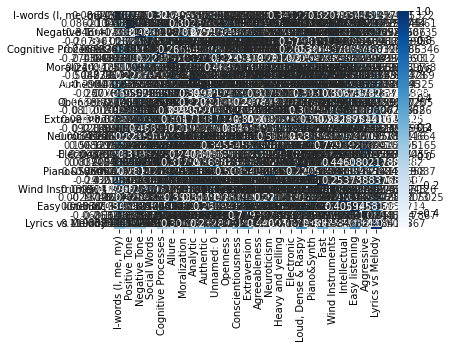

In [56]:
Corr_df.corr()
res1 = Corr_df.corr()
sns.heatmap(res1, annot=True, fmt='', cmap='Blues')

In [57]:
from scipy.stats import pearsonr
rho = Corr_df.corr()
pval = Corr_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
corr_result = rho.round(2).astype(str) + p

In [58]:
temp = corr_result[['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic', 'Openness', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism']]
temp

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
"I-words (I, me, my)",1.0***,0.09,-0.34,-0.27,0.22,-0.27,-0.24,-0.5**,0.32,-0.07,-0.08,0.03,-0.09,0.01
Positive Tone,0.09,1.0***,-0.13,-0.14,0.09,-0.14,-0.24,0.09,-0.3,0.3,0.11,-0.31,0.12,-0.22
Negative Tone,-0.34,-0.13,1.0***,0.37*,-0.08,-0.14,0.41*,-0.24,-0.45*,0.18,0.28,0.27,0.17,-0.23
Social Words,-0.27,-0.14,0.37*,1.0***,0.03,0.18,0.14,-0.16,-0.32,-0.03,0.1,0.1,0.09,0.07
Cognitive Processes,0.22,0.09,-0.08,0.03,1.0***,0.03,0.11,-0.47**,-0.03,-0.25,0.07,0.1,-0.27,-0.2
Allure,-0.27,-0.14,-0.14,0.18,0.03,1.0***,-0.21,0.22,0.05,-0.14,0.02,0.12,-0.14,0.23
Moralization,-0.24,-0.24,0.41*,0.14,0.11,-0.21,1.0***,-0.07,-0.09,0.04,-0.12,-0.06,0.47*,0.11
Analytic,-0.5**,0.09,-0.24,-0.16,-0.47**,0.22,-0.07,1.0***,-0.04,-0.02,-0.24,-0.04,0.19,-0.03
Authentic,0.32,-0.3,-0.45*,-0.32,-0.03,0.05,-0.09,-0.04,1.0***,-0.11,-0.08,0.05,-0.35,0.17
Unnamed: 0,0.28,-0.25,0.07,-0.16,0.27,0.06,-0.07,-0.46*,0.22,-0.1,0.4*,0.3,-0.25,0.15


In [59]:
corr_result

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic,Unnamed: 0,...,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
"I-words (I, me, my)",1.0***,0.09,-0.34,-0.27,0.22,-0.27,-0.24,-0.5**,0.32,0.28,...,0.16,-0.02,0.08,-0.08,0.34,0.14,0.0,0.07,0.32,0.12
Positive Tone,0.09,1.0***,-0.13,-0.14,0.09,-0.14,-0.24,0.09,-0.3,-0.25,...,0.01,-0.01,0.02,-0.39*,-0.29,0.1,-0.13,-0.0,-0.07,-0.02
Negative Tone,-0.34,-0.13,1.0***,0.37*,-0.08,-0.14,0.41*,-0.24,-0.45*,0.07,...,-0.13,-0.03,0.2,-0.07,-0.43*,0.14,-0.19,0.17,-0.26,0.03
Social Words,-0.27,-0.14,0.37*,1.0***,0.03,0.18,0.14,-0.16,-0.32,-0.16,...,0.16,0.1,-0.24,-0.0,-0.21,0.58***,-0.11,-0.15,-0.1,-0.38*
Cognitive Processes,0.22,0.09,-0.08,0.03,1.0***,0.03,0.11,-0.47**,-0.03,0.27,...,0.21,0.13,0.14,-0.26,0.06,0.27,-0.09,0.35,0.13,-0.04
Allure,-0.27,-0.14,-0.14,0.18,0.03,1.0***,-0.21,0.22,0.05,0.06,...,-0.01,0.32,-0.05,0.28,-0.13,-0.18,0.23,0.06,-0.24,-0.12
Moralization,-0.24,-0.24,0.41*,0.14,0.11,-0.21,1.0***,-0.07,-0.09,-0.07,...,0.09,-0.05,0.07,-0.02,-0.18,0.0,-0.12,0.11,-0.09,-0.2
Analytic,-0.5**,0.09,-0.24,-0.16,-0.47**,0.22,-0.07,1.0***,-0.04,-0.46*,...,-0.09,-0.07,0.04,0.14,0.15,-0.22,0.0,-0.33,-0.22,0.03
Authentic,0.32,-0.3,-0.45*,-0.32,-0.03,0.05,-0.09,-0.04,1.0***,0.22,...,-0.03,-0.21,0.06,0.03,0.19,-0.3,0.04,0.04,0.17,0.16
Unnamed: 0,0.28,-0.25,0.07,-0.16,0.27,0.06,-0.07,-0.46*,0.22,1.0***,...,-0.11,-0.06,0.32,0.07,0.16,0.01,0.39*,0.13,-0.01,0.31


In [60]:
pg.partial_corr(Corr_df, x = 'Agreeableness', y = 'Moralization', covar = ['Intellectual','Easy listening','Aggressive'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,29,0.522,"[0.17, 0.76]",0.006


In [61]:
pg.partial_corr(Corr_df, x = 'Agreeableness', y = 'Moralization', covar = [	'Heavy and yelling','Electronic','Loud, Dense & Raspy','Piano&Synth','Fast','Wind Instruments'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,29,0.477,"[0.08, 0.74]",0.021


In [62]:
Corr2_df = User_dislikes_df.join(Sink)

In [63]:
Corr2_df.corr()

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic,Unnamed: 0,...,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
"I-words (I, me, my)",1.000000,0.393779,0.479063,0.752604,0.630734,0.743155,0.348322,-0.037781,0.786204,0.300157,...,0.021277,0.308551,-0.010890,-0.412224,0.045867,-0.247343,-0.108582,-0.082138,0.085682,-0.062649
Positive Tone,0.393779,1.000000,0.355992,0.553298,0.375371,0.568974,0.080237,0.332057,0.454965,0.069509,...,0.064676,0.345097,-0.070991,-0.292423,0.265135,0.102746,0.258400,-0.100824,0.142773,-0.091930
Negative Tone,0.479063,0.355992,1.000000,0.494546,0.552662,0.436038,0.629896,0.094632,0.424188,0.140594,...,-0.067564,0.172734,0.246760,-0.206190,0.220741,0.200453,0.026626,0.237024,-0.064671,0.290075
Social Words,0.752604,0.553298,0.494546,1.000000,0.788568,0.714020,0.175961,0.086232,0.571724,0.117791,...,-0.031063,0.468619,-0.021266,-0.198052,0.138566,-0.196347,0.078019,-0.032199,-0.022084,0.003561
Cognitive Processes,0.630734,0.375371,0.552662,0.788568,1.000000,0.636319,0.062202,-0.077748,0.454750,0.075790,...,0.016497,0.341940,0.153286,-0.133992,0.230312,-0.241187,-0.148148,-0.003815,0.104444,0.019526
Allure,0.743155,0.568974,0.436038,0.714020,0.636319,1.000000,0.184295,0.212971,0.726881,0.034725,...,0.226439,0.205563,-0.023372,-0.350186,-0.090749,-0.136451,-0.034708,0.020876,0.163277,-0.140662
Moralization,0.348322,0.080237,0.629896,0.175961,0.062202,0.184295,1.000000,0.295046,0.381353,0.053945,...,-0.109450,0.017816,-0.021915,-0.321197,-0.023349,0.359996,-0.038078,0.248975,-0.094764,0.099082
Analytic,-0.037781,0.332057,0.094632,0.086232,-0.077748,0.212971,0.295046,1.000000,0.231791,0.239444,...,0.038591,0.175405,0.048602,0.132738,0.048846,0.614285,0.276903,0.140032,-0.028229,-0.042107
Authentic,0.786204,0.454965,0.424188,0.571724,0.454750,0.726881,0.381353,0.231791,1.000000,0.271445,...,0.093960,0.294574,-0.067711,-0.505848,-0.093942,0.097560,0.189875,-0.216219,0.161726,-0.154847
Unnamed: 0,0.300157,0.069509,0.140594,0.117791,0.075790,0.034725,0.053945,0.239444,0.271445,1.000000,...,-0.125386,-0.090426,0.275315,0.029411,0.231426,0.031333,0.378311,0.164052,0.003177,0.384928


In [64]:
rho = Corr2_df.corr()
pval = Corr2_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
corr2_result = rho.round(2).astype(str) + p
corr2_result

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic,Unnamed: 0,...,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
"I-words (I, me, my)",1.0***,0.39*,0.48*,0.75***,0.63***,0.74***,0.35,-0.04,0.79***,0.3,...,0.02,0.31,-0.01,-0.41*,0.05,-0.25,-0.11,-0.08,0.09,-0.06
Positive Tone,0.39*,1.0***,0.36,0.55**,0.38,0.57**,0.08,0.33,0.45*,0.07,...,0.06,0.35,-0.07,-0.29,0.27,0.1,0.26,-0.1,0.14,-0.09
Negative Tone,0.48*,0.36,1.0***,0.49**,0.55**,0.44*,0.63***,0.09,0.42*,0.14,...,-0.07,0.17,0.25,-0.21,0.22,0.2,0.03,0.24,-0.06,0.29
Social Words,0.75***,0.55**,0.49**,1.0***,0.79***,0.71***,0.18,0.09,0.57**,0.12,...,-0.03,0.47*,-0.02,-0.2,0.14,-0.2,0.08,-0.03,-0.02,0.0
Cognitive Processes,0.63***,0.38,0.55**,0.79***,1.0***,0.64***,0.06,-0.08,0.45*,0.08,...,0.02,0.34,0.15,-0.13,0.23,-0.24,-0.15,-0.0,0.1,0.02
Allure,0.74***,0.57**,0.44*,0.71***,0.64***,1.0***,0.18,0.21,0.73***,0.03,...,0.23,0.21,-0.02,-0.35,-0.09,-0.14,-0.03,0.02,0.16,-0.14
Moralization,0.35,0.08,0.63***,0.18,0.06,0.18,1.0***,0.3,0.38*,0.05,...,-0.11,0.02,-0.02,-0.32,-0.02,0.36,-0.04,0.25,-0.09,0.1
Analytic,-0.04,0.33,0.09,0.09,-0.08,0.21,0.3,1.0***,0.23,0.24,...,0.04,0.18,0.05,0.13,0.05,0.61***,0.28,0.14,-0.03,-0.04
Authentic,0.79***,0.45*,0.42*,0.57**,0.45*,0.73***,0.38*,0.23,1.0***,0.27,...,0.09,0.29,-0.07,-0.51**,-0.09,0.1,0.19,-0.22,0.16,-0.15
Unnamed: 0,0.3,0.07,0.14,0.12,0.08,0.03,0.05,0.24,0.27,1.0***,...,-0.13,-0.09,0.28,0.03,0.23,0.03,0.38,0.16,0.0,0.38


In [65]:
temp2 = corr2_result[['I-words (I, me, my)', 'Positive Tone', 'Negative Tone', 'Social Words', 'Cognitive Processes', 'Allure', 'Moralization', 'Analytic', 'Authentic', 'Openness', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism']]
temp2

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
"I-words (I, me, my)",1.0***,0.39*,0.48*,0.75***,0.63***,0.74***,0.35,-0.04,0.79***,0.2,0.41*,0.04,0.03,-0.01
Positive Tone,0.39*,1.0***,0.36,0.55**,0.38,0.57**,0.08,0.33,0.45*,0.23,-0.05,-0.09,0.01,-0.03
Negative Tone,0.48*,0.36,1.0***,0.49**,0.55**,0.44*,0.63***,0.09,0.42*,-0.27,0.28,0.3,-0.09,-0.25
Social Words,0.75***,0.55**,0.49**,1.0***,0.79***,0.71***,0.18,0.09,0.57**,-0.01,0.08,0.32,0.05,0.0
Cognitive Processes,0.63***,0.38,0.55**,0.79***,1.0***,0.64***,0.06,-0.08,0.45*,-0.32,-0.0,0.27,-0.2,-0.09
Allure,0.74***,0.57**,0.44*,0.71***,0.64***,1.0***,0.18,0.21,0.73***,0.09,0.17,0.01,0.1,-0.14
Moralization,0.35,0.08,0.63***,0.18,0.06,0.18,1.0***,0.3,0.38*,0.04,0.38,0.22,0.03,-0.34
Analytic,-0.04,0.33,0.09,0.09,-0.08,0.21,0.3,1.0***,0.23,-0.09,0.01,0.22,0.12,-0.0
Authentic,0.79***,0.45*,0.42*,0.57**,0.45*,0.73***,0.38*,0.23,1.0***,0.4*,0.41*,0.04,0.13,-0.11
Unnamed: 0,0.3,0.07,0.14,0.12,0.08,0.03,0.05,0.24,0.27,-0.14,0.4*,0.28,-0.26,0.13


In [70]:
pg.partial_corr(Corr2_df, x = 'Conscientiousness', y = 'I-words (I, me, my)', covar = ['Intellectual','Easy listening','Aggressive'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,26,0.476,"[0.08, 0.74]",0.022


In [71]:
pg.partial_corr(Corr2_df, x = 'Conscientiousness', y = 'I-words (I, me, my)', covar = ['Heavy and yelling','Electronic','Loud, Dense & Raspy','Piano&Synth','Fast','Wind Instruments'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,26,0.516,"[0.1, 0.78]",0.02


In [72]:
pg.partial_corr(Corr2_df, x = 'Conscientiousness', y = 'Authentic', covar = ['Intellectual','Easy listening','Aggressive'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,26,0.445,"[0.04, 0.72]",0.033


In [73]:
pg.partial_corr(Corr2_df, x = 'Conscientiousness', y = 'Authentic', covar = ['Heavy and yelling','Electronic','Loud, Dense & Raspy','Piano&Synth','Fast','Wind Instruments'], method = 'pearson').round(3)

,n,r,CI95%,p-val
pearson,26,0.419,"[-0.03, 0.73]",0.066
